<a href="https://colab.research.google.com/github/TioHalu/Forest_Fire_Prediction_Colab/blob/main/Vector_autoregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
df=pd.read_csv('/content/drive/MyDrive/tugas/dataset/weatherHistory.csv')


In [37]:
col = ['Formatted Date','Summary','Precip Type','Apparent Temperature (C)','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)','Daily Summary']
dfNew = df.drop(col, axis="columns", inplace=True)
dfNew= df.drop(df.index[100:])
dfReal = df.drop(df.index[125:])
data= pd.DataFrame(dfNew)
dfNew

,Temperature (C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83
...,...,...
95,7.855556,0.72
96,7.316667,0.75
97,7.244444,0.75
98,5.438889,0.88


In [45]:
model = VAR(dfNew)
results = model.fit()

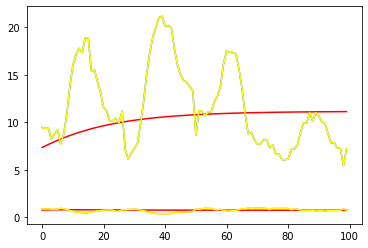

In [49]:
import matplotlib.pyplot as plt
predictions = results.forecast(results.endog,100)
plt.plot(data)
plt.plot(predictions, color='red')
plt.plot(data, color="yellow")

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import mean_absolute_percentage_error
mse = mean_squared_error(dfNew, predictions)
mae = mean_absolute_error(dfNew, predictions)
mape = mean_absolute_percentage_error(dfNew, predictions)
r_score=  r2_score(dfNew, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r_score}")

Mean Squared Error: 10.68881861677104
Mean Absolute Percentage Error: 0.2620745383132196
Mean Absolute Error: 1.894736498185794
R-Squared: -0.14324735520035758
